In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
file_path = 'coachs1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the dataframe
df.head()



,Name,age,nationalité,periode moy,licence,formation prefere,agnets,Matchs,win,tie,lose,pbut,joueursU,PPM
0,Franz Weselik,20 avr. 1903,Autriche,"1,00 Ans",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Robert Vicot,29 oct. 1931 (93),France,"2,55 Ans",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pierre Phélipon,5 févr. 1935 (90),France,"1,96 Ans",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Robert Dewilder,6 mars 1943 (82),France,"1,87 Ans",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Olivier Dall'Oglio,16 mai 1964 (60),France\n Italie,"2,14 Ans",Licence pro UEFA,4-3-3 offensively-minded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 1. Handle the 'age' column
# Extract the birth year from the 'age' column
def extract_birth_year(age_str):
    try:
        # Split the string and extract the year
        parts = age_str.split()
        year = parts[-1].strip('()')
        return int(year)
    except:
        return np.nan

# Apply the function to the 'age' column
df['birth_year'] = df['age'].apply(extract_birth_year)

# Calculate the age of the coaches (assuming the current year is 2023)
current_year = 2023
df['age'] = current_year - df['birth_year']

# Drop the 'birth_year' column as it's no longer needed
df.drop(columns=['birth_year'], inplace=True)

# 2. Handle the 'periode moy' column
# Remove the "Ans" suffix and replace commas with periods
def clean_periode_moy(value):
    try:
        # Remove "Ans" and replace comma with period
        cleaned_value = value.replace('Ans', '').replace(',', '.').strip()
        return float(cleaned_value)
    except:
        return np.nan

# Apply the function to the 'periode moy' column
df['periode moy'] = df['periode moy'].apply(clean_periode_moy)

# Convert 'win', 'tie', and 'lose' columns from string to numeric
df['win'] = pd.to_numeric(df['win'], errors='coerce')
df['tie'] = pd.to_numeric(df['tie'], errors='coerce')
df['lose'] = pd.to_numeric(df['lose'], errors='coerce')

# Replace NaN values with the mean of each column
df['win'].fillna(df['win'].mean(), inplace=True)
df['tie'].fillna(df['tie'].mean(), inplace=True)
df['lose'].fillna(df['lose'].mean(), inplace=True)

C:\Users\hamou\AppData\Local\Temp\ipykernel_12652\168462228.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['win'].fillna(df['win'].mean(), inplace=True)
C:\Users\hamou\AppData\Local\Temp\ipykernel_12652\168462228.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Missing Values in Each Column:
Name                   0
age                    2
nationalité            0
periode moy            1
licence              350
formation prefere    454
agnets               517
Matchs               479
win                    0
tie                    0
lose                   0
pbut                 479
joueursU             479
PPM                  479
dtype: int64
Dataset Overview:
Number of rows: 622
Number of columns: 14

Column Types:
Name                  object
age                  float64
nationalité           object
periode moy          float64
licence               object
formation prefere     object
agnets                object
Matchs                object
win                  float64
tie                  float64
lose                 float64
pbut                  object
joueursU              object
PPM                   object
dtype: object
Name                   0
age                    2
nationalité            0
periode moy            1
licence    

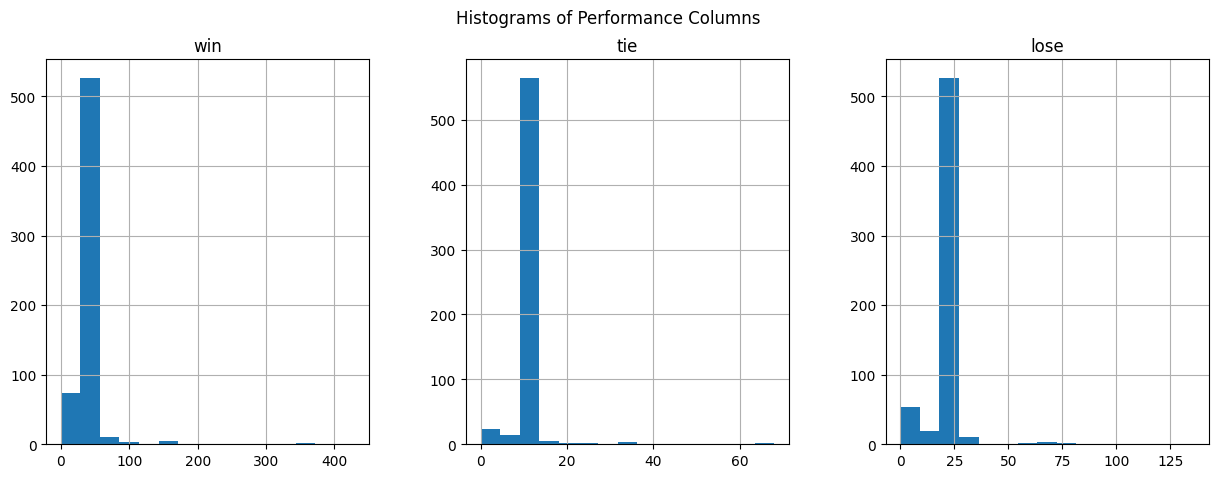

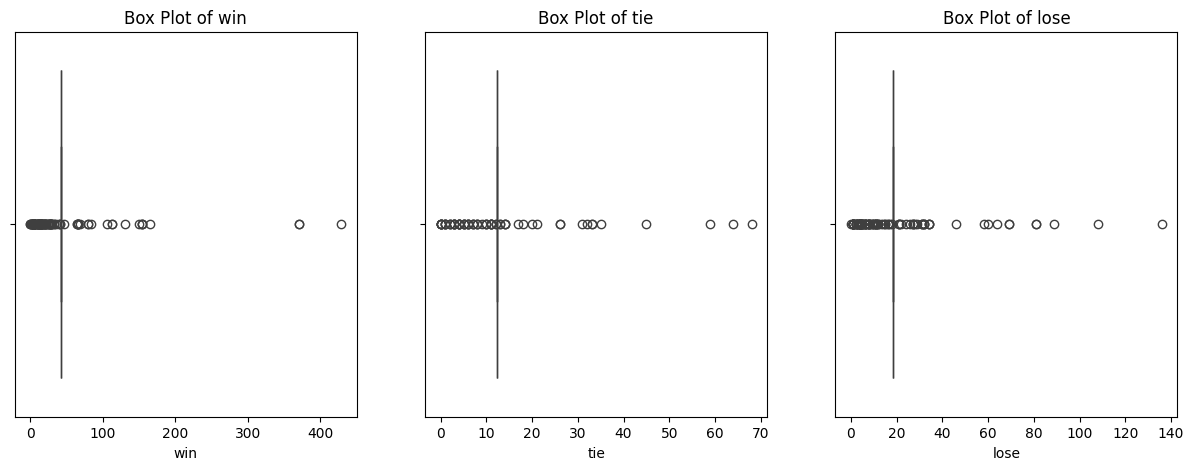

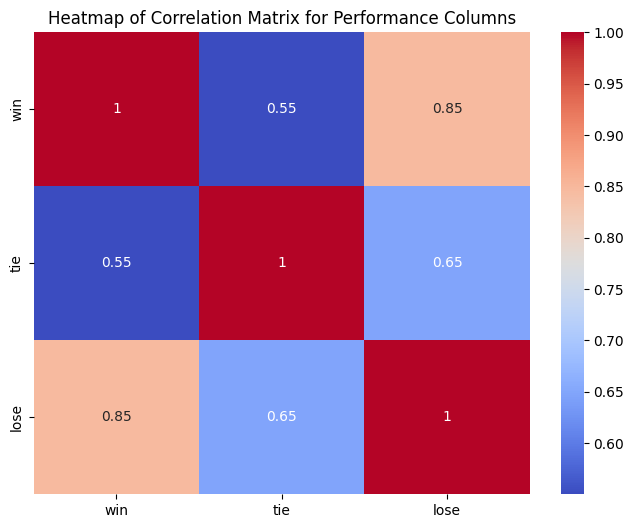


Coach Performance Metrics:
                 Name        win        tie       lose  total_matches  \
0       Franz Weselik  41.730769  12.347826  18.278846      72.357441   
1        Robert Vicot  41.730769  12.347826  18.278846      72.357441   
2     Pierre Phélipon  41.730769  12.347826  18.278846      72.357441   
3     Robert Dewilder  41.730769  12.347826  18.278846      72.357441   
4  Olivier Dall'Oglio  41.730769  12.347826  18.278846      72.357441   

   win_rate  tie_rate  loss_rate  
0  0.576731   0.17065   0.252619  
1  0.576731   0.17065   0.252619  
2  0.576731   0.17065   0.252619  
3  0.576731   0.17065   0.252619  
4  0.576731   0.17065   0.252619  


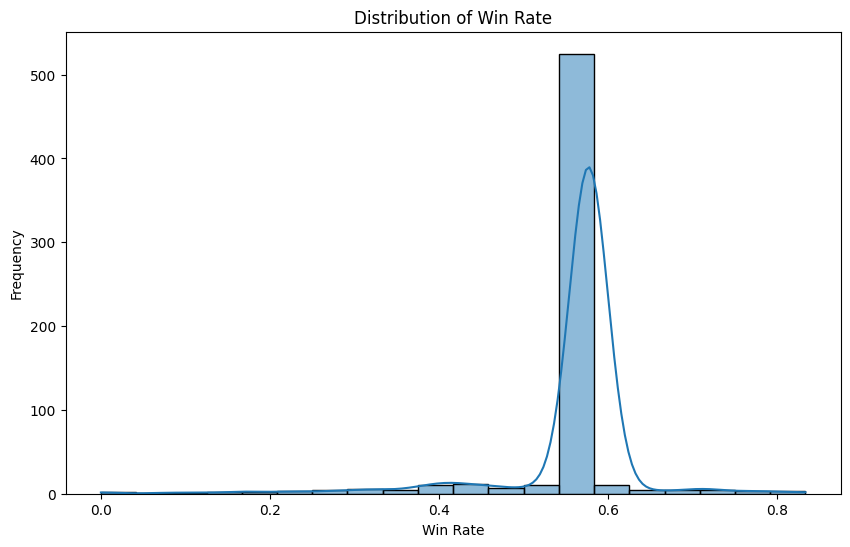

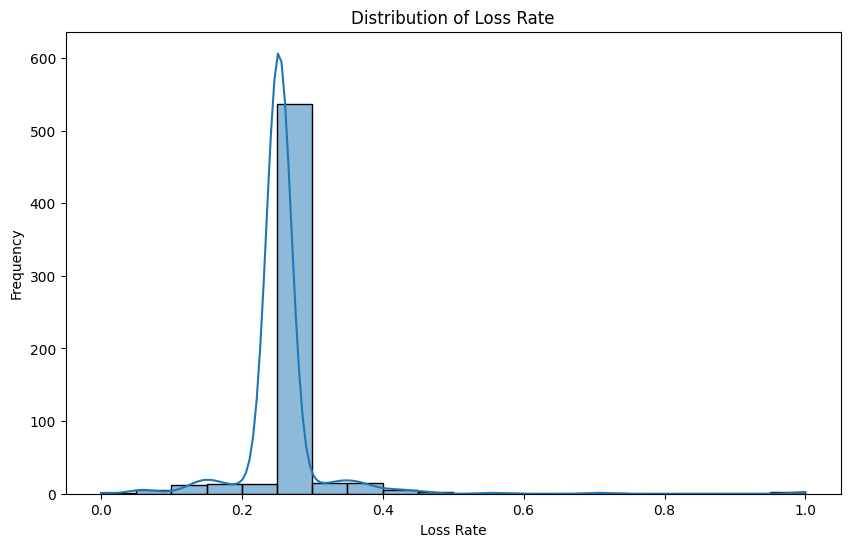


Top 10 Coaches by Win Rate:
                    Name  win_rate  total_matches
246  Mauricio Pochettino  0.833333       6.000000
359  Mauricio Pochettino  0.833333       6.000000
621        Pep Guardiola  0.798970     464.347826
619      Carlo Ancelotti  0.780348     197.347826
244        Laurent Blanc  0.777778      27.000000
299     Roberto Martínez  0.769231      26.000000
614        Diego Simeone  0.743053     577.347826
616         Luis Enrique  0.735728      88.347826
371        Pep Guardiola  0.718992     516.000000
347      Brendan Rodgers  0.718750      96.000000

Bottom 10 Coaches by Win Rate:
                    Name  win_rate  total_matches
16     Jean-Guy Wallemme  0.000000       1.000000
239      Leonardo Jardim  0.000000       1.000000
529        Quique Setién  0.074919      13.347826
474       Eduardo Coudet  0.103371      19.347826
321          Mark Hughes  0.142857       7.000000
436  Mauricio Pellegrino  0.163507      18.347826
109    Jean-Louis Gasset  0.176471     

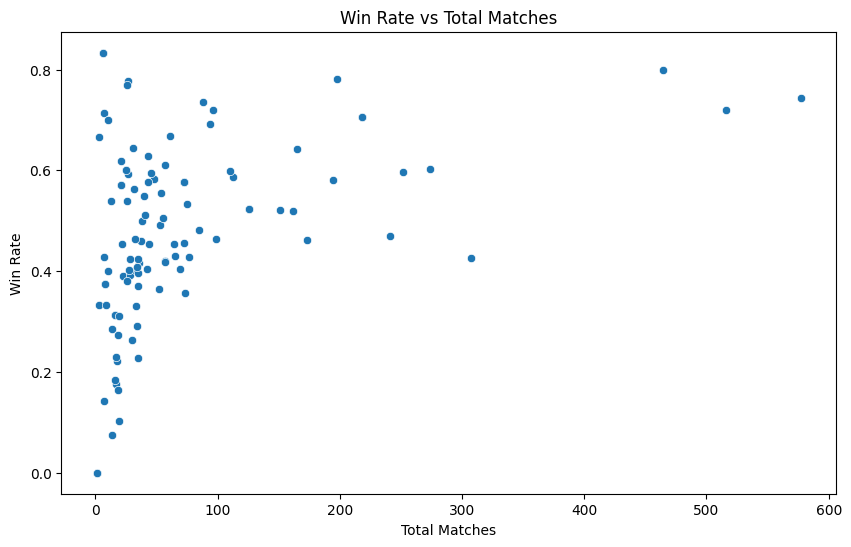

In [5]:
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)
# Dataset Overview
print("Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn Types:")
print(df.dtypes)

print(df.isnull().sum())

# Feature Inspection
print("\nFeature Inspection:")
print(df.info())
print("\nDescriptive Statistics for Performance Columns:")
print(df[['win', 'tie', 'lose']].describe())

# Data Quality Assessment
print("\nData Quality Assessment:")
print("Missing Values in Performance Columns:")
print(df[['win', 'tie', 'lose']].isnull().sum())

# Relationships Between Features
print("\nRelationships Between Features:")
# Correlation matrix for performance columns
performance_columns = ['win', 'tie', 'lose']
correlation_matrix = df[performance_columns].corr()
print("Correlation Matrix for Performance Columns:")
print(correlation_matrix)

# Basic Visualizations
# Histograms for performance columns
df[performance_columns].hist(bins=15, figsize=(15, 5), layout=(1, 3))
plt.suptitle('Histograms of Performance Columns')
plt.show()

# Box plots for performance columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(performance_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.show()

# Heatmap for correlation matrix of performance columns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix for Performance Columns')
plt.show()

# Coach Performance Evaluation
# Calculate total matches for each coach
df['total_matches'] = df['win'] + df['tie'] + df['lose']

# Calculate win rate, tie rate, and loss rate
df['win_rate'] = df['win'] / df['total_matches']
df['tie_rate'] = df['tie'] / df['total_matches']
df['loss_rate'] = df['lose'] / df['total_matches']

# Display the new performance metrics
print("\nCoach Performance Metrics:")
print(df[['Name', 'win', 'tie', 'lose', 'total_matches', 'win_rate', 'tie_rate', 'loss_rate']].head())

# Visualize Win Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['win_rate'], kde=True, bins=20)
plt.title('Distribution of Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.show()

# Visualize Loss Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['loss_rate'], kde=True, bins=20)
plt.title('Distribution of Loss Rate')
plt.xlabel('Loss Rate')
plt.ylabel('Frequency')
plt.show()

# Top 10 Coaches by Win Rate
top_10_win_rate = df.sort_values(by='win_rate', ascending=False).head(10)
print("\nTop 10 Coaches by Win Rate:")
print(top_10_win_rate[['Name', 'win_rate', 'total_matches']])

# Bottom 10 Coaches by Win Rate
bottom_10_win_rate = df.sort_values(by='win_rate', ascending=True).head(10)
print("\nBottom 10 Coaches by Win Rate:")
print(bottom_10_win_rate[['Name', 'win_rate', 'total_matches']])

# Scatter Plot: Win Rate vs Total Matches
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_matches', y='win_rate', data=df)
plt.title('Win Rate vs Total Matches')
plt.xlabel('Total Matches')
plt.ylabel('Win Rate')
plt.show()

In [6]:
# Data Cleaning
# 1. Handle the 'age' column
# Extract the birth year from the 'age' column
def extract_birth_year(age_str):
    try:
        # Split the string and extract the year
        parts = age_str.split()
        year = parts[-1].strip('()')
        return int(year)
    except:
        return np.nan

# Apply the function to the 'age' column
df['birth_year'] = df['age'].apply(extract_birth_year)

# Calculate the age of the coaches (assuming the current year is 2023)
current_year = 2023
df['age'] = current_year - df['birth_year']

# Drop the 'birth_year' column as it's no longer needed
df.drop(columns=['birth_year'], inplace=True)

# 2. Handle the 'periode moy' column
# Remove the "Ans" suffix and replace commas with periods
def clean_periode_moy(value):
    try:
        # Remove "Ans" and replace comma with period
        cleaned_value = value.replace('Ans', '').replace(',', '.').strip()
        return float(cleaned_value)
    except:
        return np.nan

# Apply the function to the 'periode moy' column
df['periode moy'] = df['periode moy'].apply(clean_periode_moy)

# 3. Handle missing values
# For numerical columns, fill missing values with the mean or median
# Avoid chained assignment by using direct assignment
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

median_periode_moy = df['periode moy'].median()
df['periode moy'] = df['periode moy'].fillna(median_periode_moy)

# For categorical columns, fill missing values with the mode or a placeholder
df['formation prefere'] = df['formation prefere'].fillna('Unknown')
df['licence'] = df['licence'].fillna('Unknown')

# 4. Convert columns to appropriate data types
df['periode moy'] = df['periode moy'].astype(float)

# 5. Remove unnecessary columns if any
# df.drop(columns=['column_name'], inplace=True)

c:\Users\hamou\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\hamou\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [7]:
# 2. Convert columns to appropriate data types
df['age'] = pd.to_datetime(df['age'], errors='coerce')
df['periode moy'] = df['periode moy'].astype(float)

In [8]:
# Exploratory Data Analysis (EDA)
# 1. Summary statistics
print(df.describe())

       age  periode moy         win         tie        lose  total_matches  \
count    0          0.0  622.000000  622.000000  622.000000     622.000000   
mean   NaT          NaN   41.730769   12.347826   18.278846      72.357441   
min    NaT          NaN    0.000000    0.000000    0.000000       1.000000   
25%    NaT          NaN   41.730769   12.347826   18.278846      72.357441   
50%    NaT          NaN   41.730769   12.347826   18.278846      72.357441   
75%    NaT          NaN   41.730769   12.347826   18.278846      72.357441   
max    NaT          NaN  429.000000   68.000000  136.000000     577.347826   
std    NaN          NaN   29.260572    4.888392    9.834288      41.030366   

         win_rate    tie_rate   loss_rate  
count  622.000000  622.000000  622.000000  
mean     0.559997    0.183555    0.256448  
min      0.000000    0.000000    0.000000  
25%      0.576731    0.170650    0.252619  
50%      0.576731    0.170650    0.252619  
75%      0.576731    0.170650    

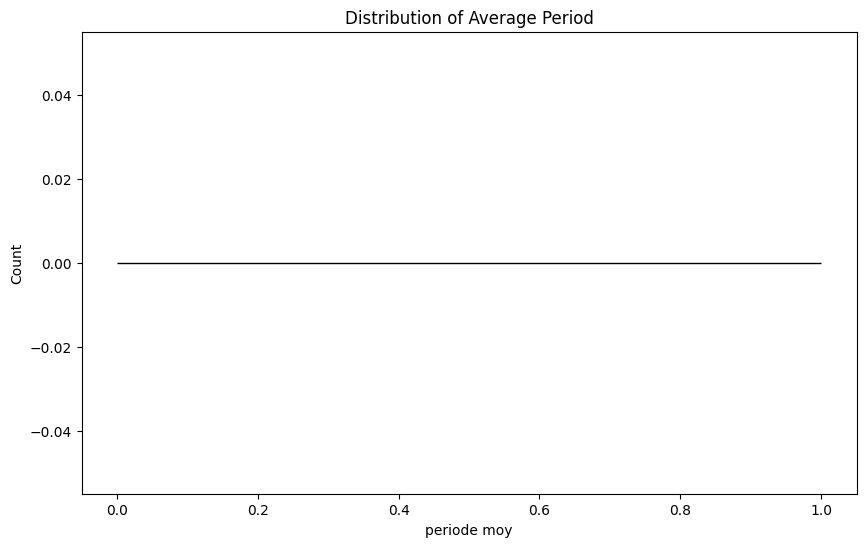

In [9]:
# 2. Distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['periode moy'], kde=True)
plt.title('Distribution of Average Period')
plt.show()

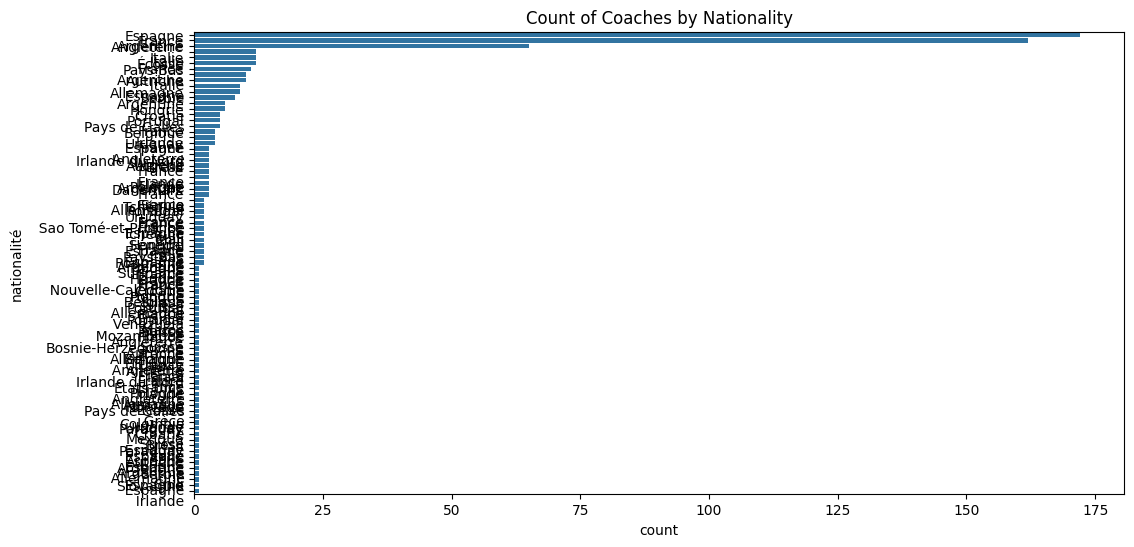

In [10]:
# 3. Count of coaches by nationality
plt.figure(figsize=(12, 6))
sns.countplot(y='nationalité', data=df, order=df['nationalité'].value_counts().index)
plt.title('Count of Coaches by Nationality')
plt.show()

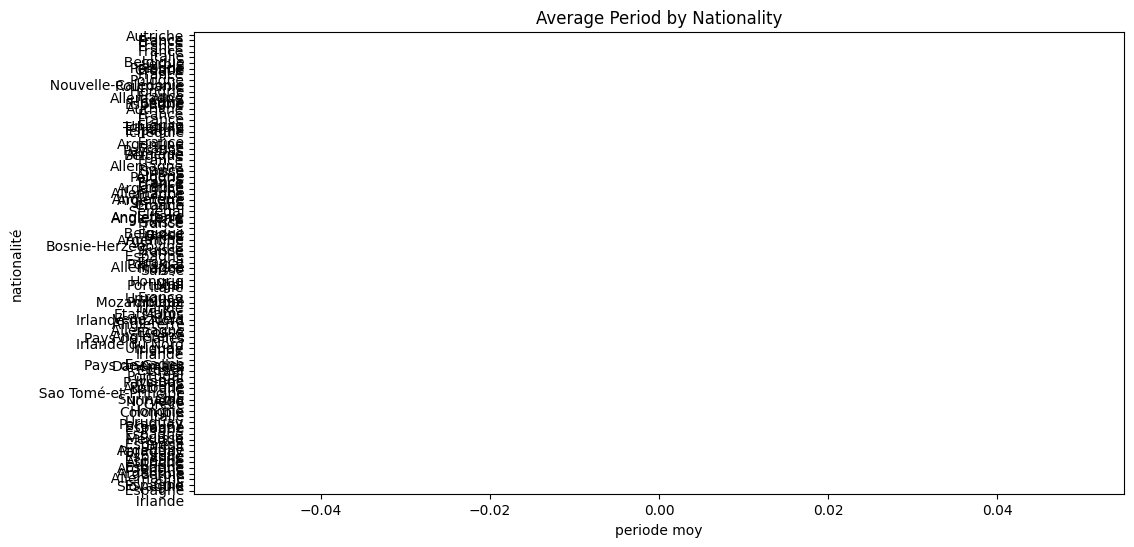

In [11]:
# 4. Average period by nationality
plt.figure(figsize=(12, 6))
sns.barplot(x='periode moy', y='nationalité', data=df, estimator=np.mean)
plt.title('Average Period by Nationality')
plt.show()

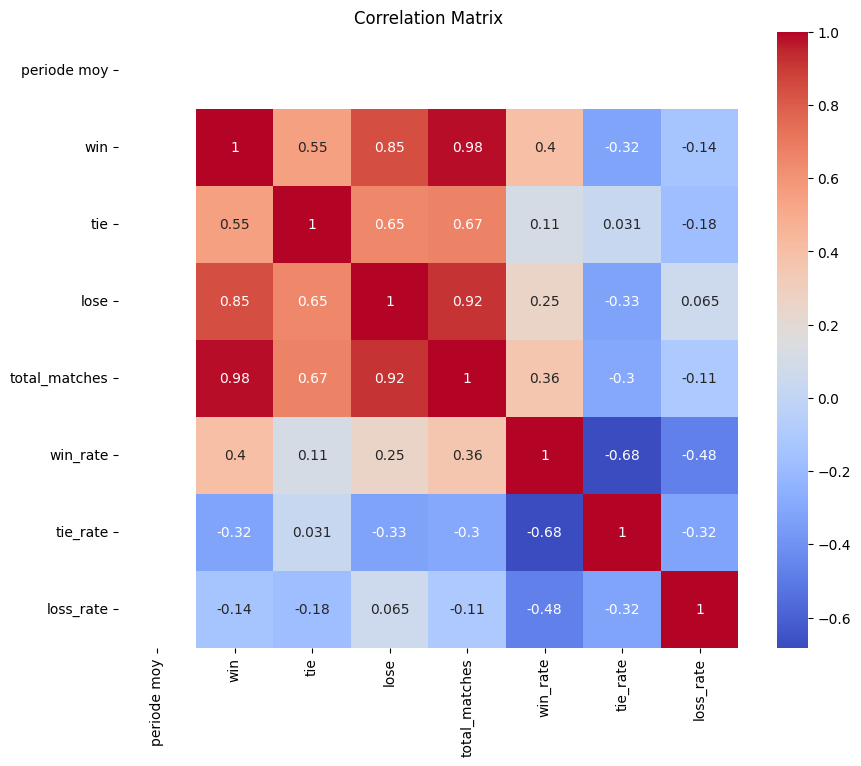

In [12]:
# 5. Correlation matrix for numerical columns
# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

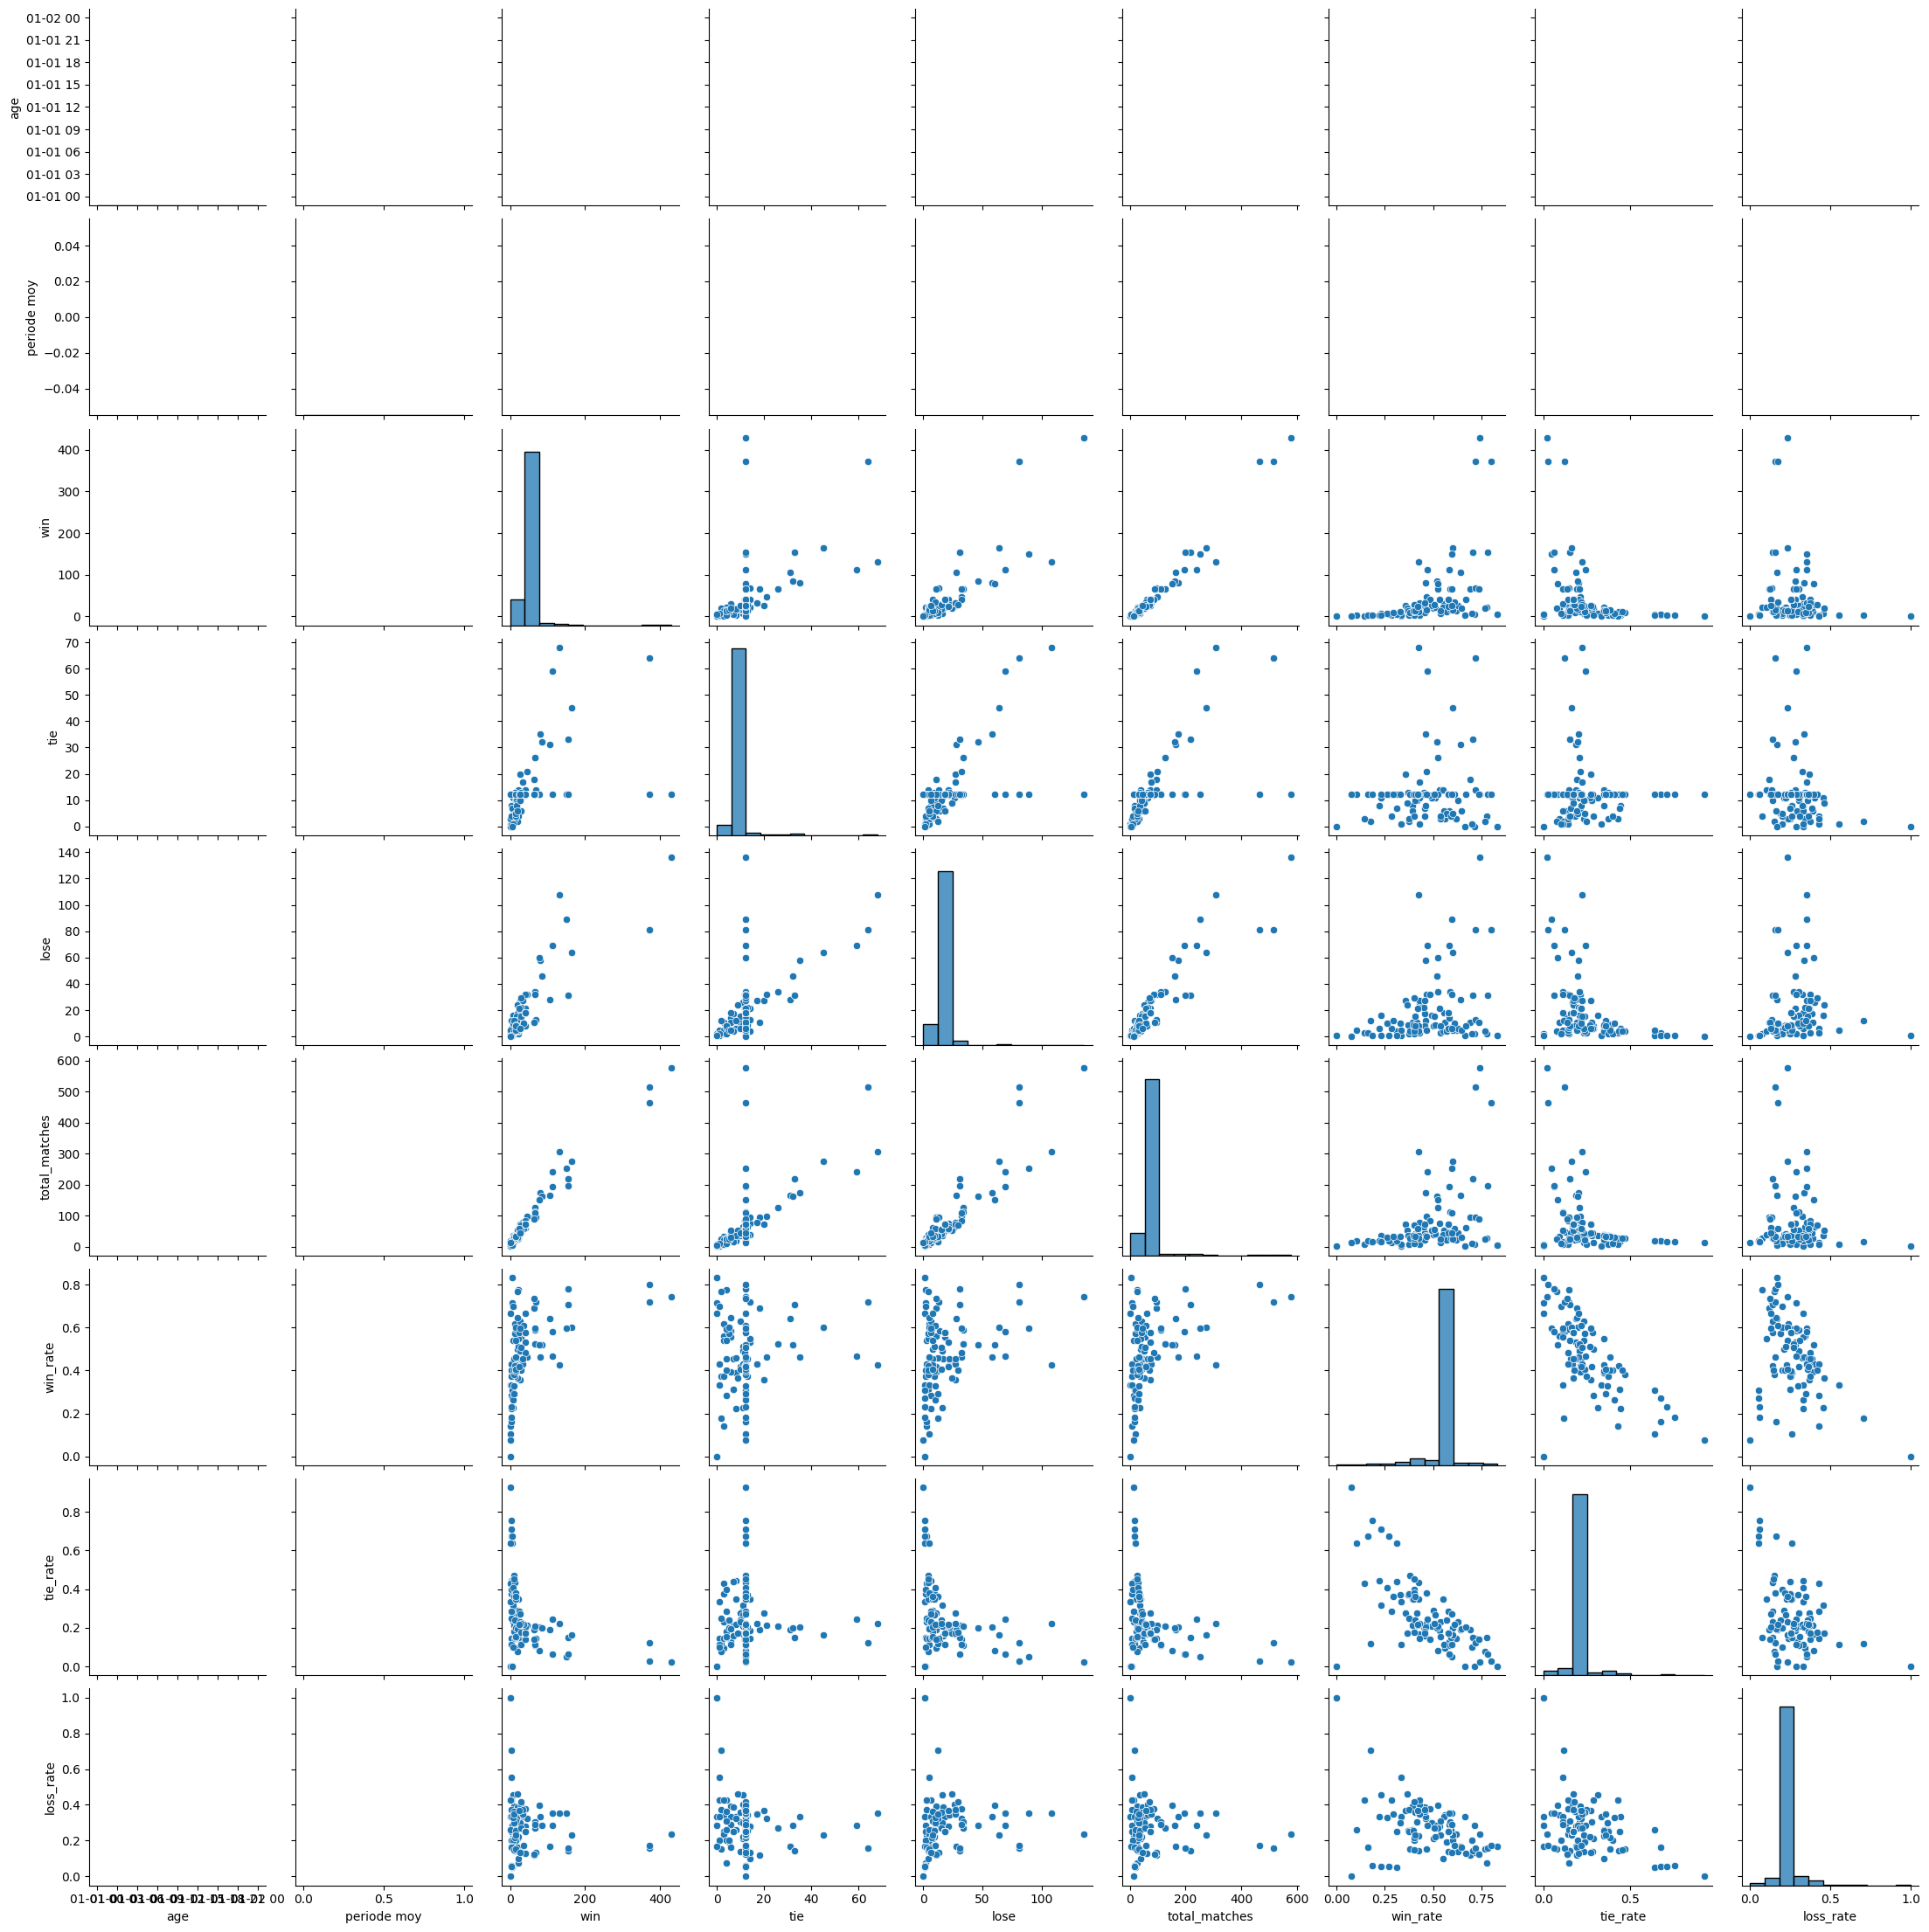

In [13]:
# 6. Pairplot for numerical columns
sns.pairplot(df)
plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

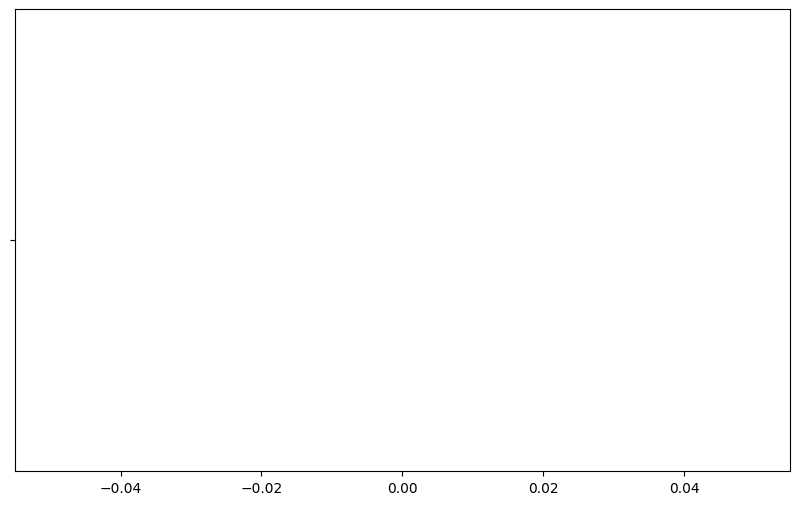

In [14]:
# 7. Boxplot for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='periode moy', data=df)
plt.title('Boxplot of Average Period')
plt.show()

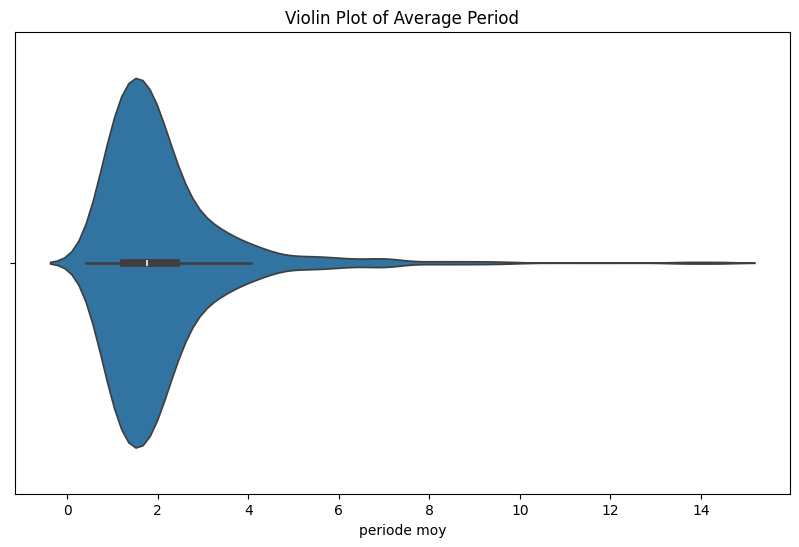

In [ ]:
# 8. Violin plot for numerical columns
plt.figure(figsize=(10, 6))
sns.violinplot(x='periode moy', data=df)
plt.title('Violin Plot of Average Period')
plt.show()

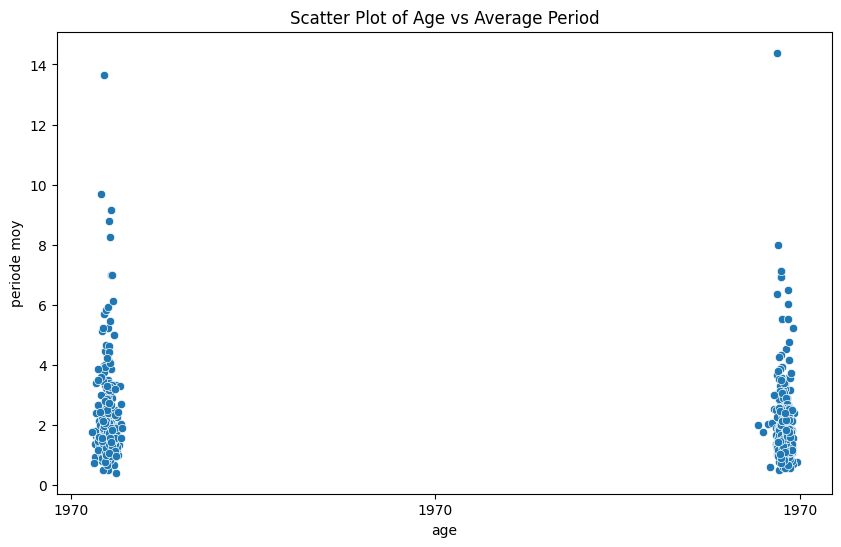

In [ ]:

# 9. Scatter plot for numerical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='periode moy', data=df)
plt.title('Scatter Plot of Age vs Average Period')
plt.show()

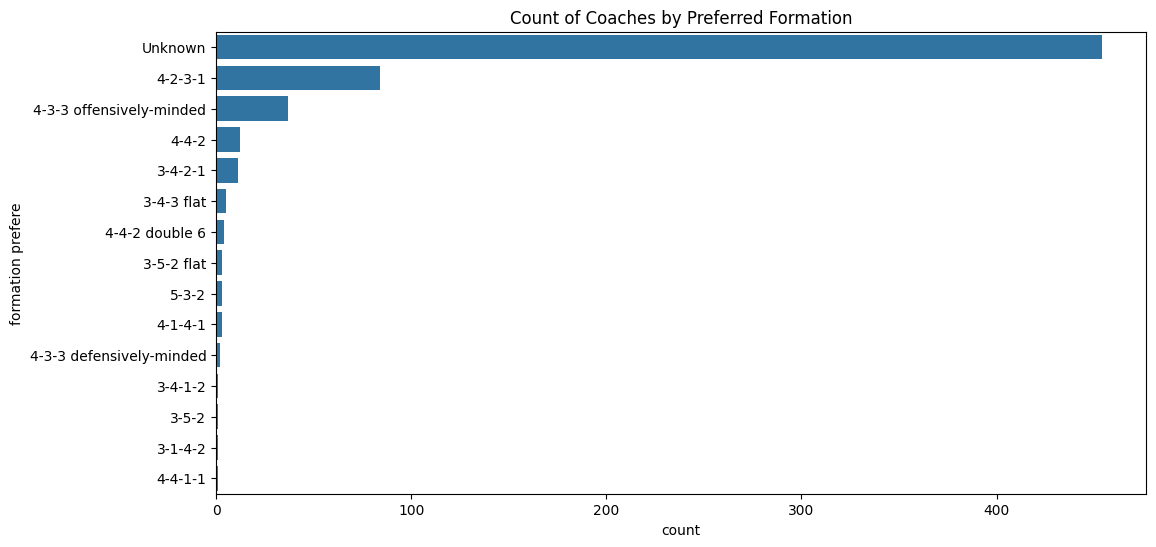

In [ ]:
# 10. Categorical data analysis
# For example, count of coaches by preferred formation
plt.figure(figsize=(12, 6))
sns.countplot(y='formation prefere', data=df, order=df['formation prefere'].value_counts().index)
plt.title('Count of Coaches by Preferred Formation')
plt.show()

In [ ]:
# Save the cleaned dataframe to a new file
df.to_csv('cleaned_coachs_data.csv', index=False)

# Conclusion
print("Data cleaning and EDA completed. The cleaned data has been saved to 'cleaned_coachs_data.csv'.")

Data cleaning and EDA completed. The cleaned data has been saved to 'cleaned_coachs_data.csv'.


In [1]:
# 🎯 Prédiction du succès d’un coach avec le Machine Learning

In [2]:
import pandas as pd

# Charger les données
df = pd.read_csv("cleaned_coachs_data.csv")
df.head()

,Name,age,nationalité,periode moy,licence,formation prefere,agnets,Matchs,win,tie,lose,pbut,joueursU,PPM
0,Franz Weselik,1970-01-01 00:00:00.000000120,Autriche,1.00,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Robert Vicot,1970-01-01 00:00:00.000001930,France,2.55,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pierre Phélipon,1970-01-01 00:00:00.000001933,France,1.96,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Robert Dewilder,1970-01-01 00:00:00.000001941,France,1.87,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Olivier Dall'Oglio,1970-01-01 00:00:00.000001963,France\n Italie,2.14,Licence pro UEFA,4-3-3 offensively-minded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Nettoyage et conversion
df["coach_age"] = 2025 - df['age'].str.extract(r'(\d{4})').astype(float)
df["PPM"] = pd.to_numeric(df["PPM"], errors='coerce')
df["win"] = pd.to_numeric(df["win"], errors='coerce')
df["Matchs"] = pd.to_numeric(df["Matchs"], errors='coerce')

# Garder colonnes utiles
df_model = df[["PPM", "win", "Matchs", "formation prefere", "licence", "coach_age"]].dropna()

# Créer la variable cible (succès si PPM > 1.5)
df_model["successful"] = (df_model["PPM"] > 1.5).astype(int)

df_model.head()


,PPM,win,Matchs,formation prefere,licence,coach_age,successful


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Séparer X et y
X = df_model.drop(columns=["PPM", "successful"])
y = df_model["successful"]

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Entraîner un modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))


C:\Users\hamou\AppData\Local\Temp\ipykernel_8288\59771998.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["win"].fillna(df["win"].median(), inplace=True)
C:\Users\hamou\AppData\Local\Temp\ipykernel_8288\59771998.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

successful
0    599
1     23
Name: count, dtype: int64

📊 Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00         4

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



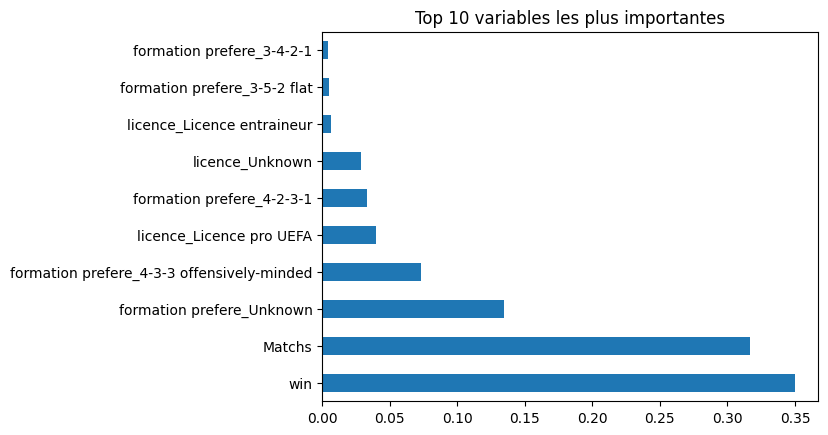

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("cleaned_coachs_data.csv")

# Nettoyage
df["coach_age"] = 2025 - df['age'].str.extract(r'(\d{4})').astype(float)
df["win"] = pd.to_numeric(df["win"], errors='coerce')
df["Matchs"] = pd.to_numeric(df["Matchs"], errors='coerce')

# Imputation
df["win"].fillna(df["win"].median(), inplace=True)
df["Matchs"].fillna(df["Matchs"].median(), inplace=True)

# Nouvelle définition du succès (plus équilibrée)
df_model = df[["win", "Matchs", "formation prefere", "licence", "coach_age"]].copy()
df_model["successful"] = (df["win"] > 45).astype(int)

# Vérifier le déséquilibre
print(df_model["successful"].value_counts())

# Séparation X / y
X = df_model.drop(columns=["successful"])
y = df_model["successful"]
X_encoded = pd.get_dummies(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Modèle avec pondération des classes
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Rapport
print("\n📊 Rapport de classification :")
print(classification_report(y_test, y_pred))

# Importance des variables
feat_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 variables les plus importantes")
plt.show()


In [21]:
from imbalanced_learn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("cleaned_coachs_data.csv")

# Préparation des colonnes
df["coach_age"] = 2025 - df['age'].str.extract(r'(\d{4})').astype(float)
df["win"] = pd.to_numeric(df["win"], errors='coerce')
df["Matchs"] = pd.to_numeric(df["Matchs"], errors='coerce')
df["win"].fillna(df["win"].median(), inplace=True)
df["Matchs"].fillna(df["Matchs"].median(), inplace=True)

# Définir la cible
df_model = df[["win", "Matchs", "formation prefere", "licence", "coach_age"]].copy()
df_model["successful"] = (df["win"] > 45).astype(int)

# Séparer X / y
X = df_model.drop(columns=["successful"])
y = df_model["successful"]
X_encoded = pd.get_dummies(X)

# SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Entraînement
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Résultats
print("\n📊 Rapport de classification avec SMOTE :")
print(classification_report(y_test, y_pred))

# Importance des variables
feat_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 variables les plus importantes")
plt.show()



ModuleNotFoundError: No module named 'imbalanced_learn'